Optimized Coefficients: [8.53347187221322, -1.5824282758139039]


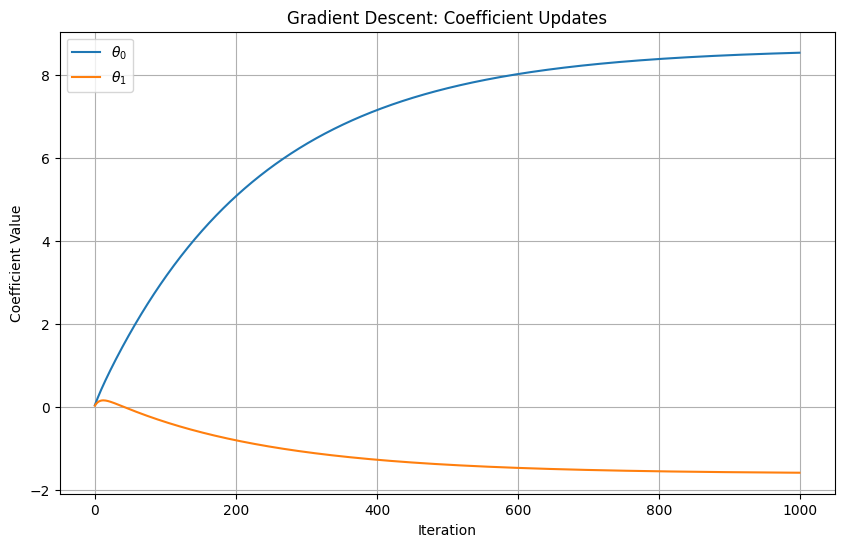

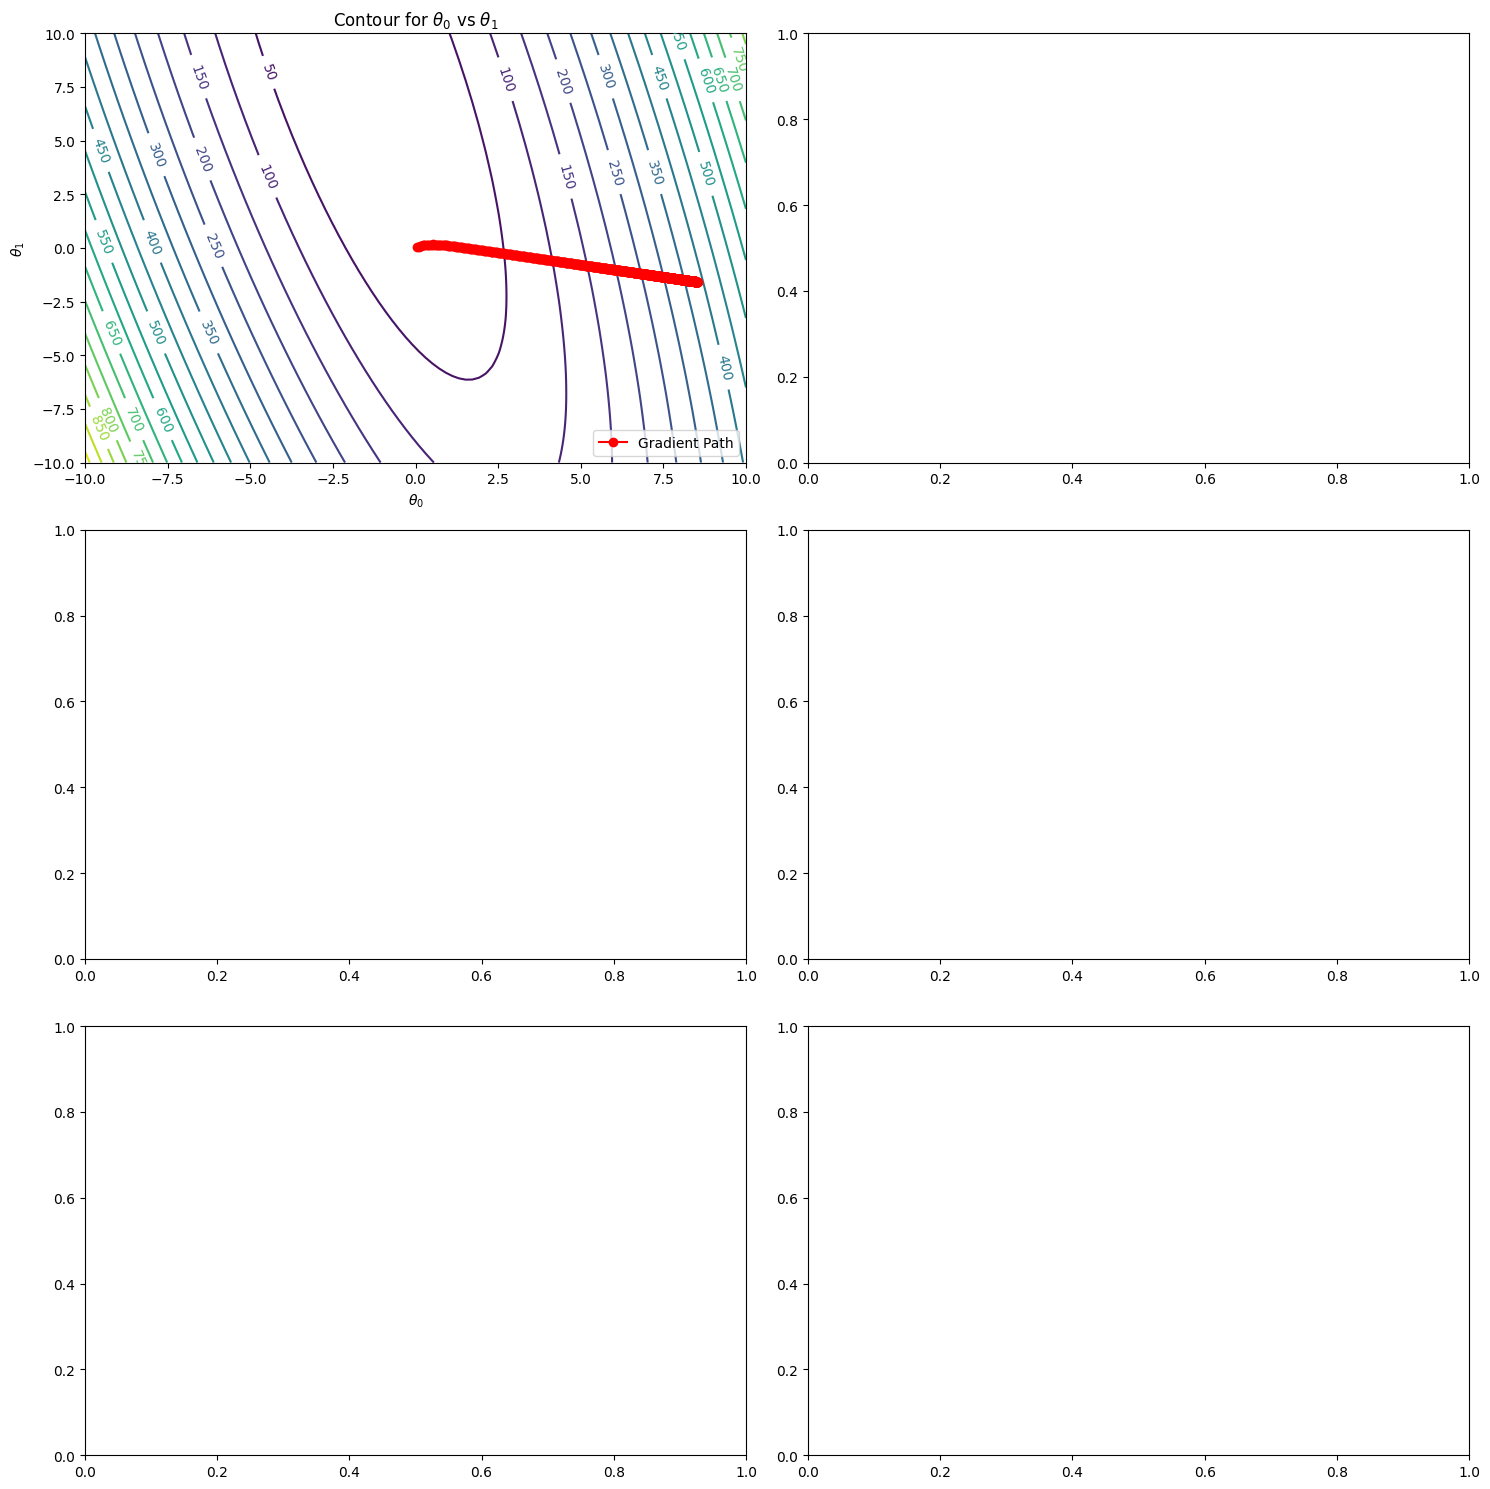

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    """
    Perform gradient descent to optimize linear regression coefficients.
    Args:
        X (list of lists): Feature matrix (including bias term).
        y (list): Target vector.
        learning_rate (float): Learning rate for gradient descent.
        iterations (int): Number of iterations.
    Returns:
        tuple: Optimized coefficients and history of coefficients.
    """
    m = len(y)  # Number of observations
    n = len(X[0])  # Number of features (including bias)

    # Initialize coefficients to zero
    coefficients = [0] * n
    coefficients_history = [[] for _ in range(n)]  # Store history for each coefficient

    for _ in range(iterations):
        # Calculate predictions
        predictions = [sum(coefficients[j] * X[i][j] for j in range(n)) for i in range(m)]

        # Compute gradients
        gradients = [0] * n
        for j in range(n):
            gradients[j] = sum((predictions[i] - y[i]) * X[i][j] for i in range(m)) / m

        # Update coefficients
        for j in range(n):
            coefficients[j] -= learning_rate * gradients[j]
            coefficients_history[j].append(coefficients[j])  # Track history

    return coefficients, coefficients_history

def plot_coefficients_history(coefficients_history):
    """
    Plot the update history of each coefficient during gradient descent.
    Args:
        coefficients_history (list of lists): History of coefficients.
    """
    plt.figure(figsize=(10, 6))
    for i, history in enumerate(coefficients_history):
        plt.plot(history, label=f"$\\theta_{i}$")
    plt.xlabel("Iteration")
    plt.ylabel("Coefficient Value")
    plt.title("Gradient Descent: Coefficient Updates")
    plt.legend()
    plt.grid()
    plt.show()

def plot_cost_function_contours(X, y, coefficients_history):
    """
    Plot contour visualization of the cost function for pairs of coefficients.
    Args:
        X (list of lists): Feature matrix.
        y (list): Target vector.
        coefficients_history (list of lists): History of coefficients.
    """
    theta_vals = np.linspace(-10, 10, 100)
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    axs = axs.flatten()

    index = 0
    for i in range(len(coefficients_history)):
        for j in range(i + 1, len(coefficients_history)):
            J_vals = np.zeros((len(theta_vals), len(theta_vals)))
            for t0_idx, t0 in enumerate(theta_vals):
                for t1_idx, t1 in enumerate(theta_vals):
                    predictions = [
                        sum(
                            (t0 if k == i else t1 if k == j else 0) * X[p][k]
                            for k in range(len(coefficients_history))
                        )
                        for p in range(len(y))
                    ]
                    J_vals[t0_idx, t1_idx] = (
                        sum((predictions[p] - y[p]) ** 2 for p in range(len(y)))
                        / (2 * len(y))
                    )

            theta_i_history = coefficients_history[i]
            theta_j_history = coefficients_history[j]

            cs = axs[index].contour(theta_vals, theta_vals, J_vals, levels=20, cmap="viridis")
            axs[index].clabel(cs, inline=1, fontsize=10)
            axs[index].plot(theta_i_history, theta_j_history, marker="o", color="r", label="Gradient Path")
            axs[index].set_title(f"Contour for $\\theta_{i}$ vs $\\theta_{j}$")
            axs[index].set_xlabel(f"$\\theta_{i}$")
            axs[index].set_ylabel(f"$\\theta_{j}$")
            axs[index].legend()
            index += 1

    plt.tight_layout()
    plt.show()

# Example usage
X = [
    [1, -1],  # Bias term + feature 1
    [1, 0],   # Bias term + feature 2
    [1, 1],   # Bias term + feature 3
    [1, 2],
    [1, 3],
    [1, 4],
    [1, 5],
    [1, 6]
]
y = [10, 9, 7, 5, 4, 3, 0, -1]  # Target vector

coefficients, coefficients_history = gradient_descent(X, y, learning_rate=0.01, iterations=1000)
print("Optimized Coefficients:", coefficients)

# Plot the coefficient updates
plot_coefficients_history(coefficients_history)

# Plot the cost function contours
plot_cost_function_contours(X, y, coefficients_history)
